In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('TM.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-05-06,115.000000,115.250000,114.839996,115.029999,104.110497,241700
1,2013-05-07,116.519997,117.570000,115.959999,116.080002,105.060829,560500
2,2013-05-08,117.739998,119.750000,116.559998,119.699997,108.337181,946500
3,2013-05-09,117.470001,118.680000,117.160004,118.139999,106.925278,1061800
4,2013-05-10,119.809998,121.379997,119.589996,121.279999,109.767204,1370800
...,...,...,...,...,...,...,...
2514,2023-05-01,137.330002,137.589996,136.550003,136.690002,136.690002,147400
2515,2023-05-02,135.300003,135.419998,134.250000,135.160004,135.160004,221700
2516,2023-05-03,135.910004,136.429993,135.309998,135.570007,135.570007,265900
2517,2023-05-04,135.199997,135.770004,134.880005,134.910004,134.910004,241800


<h3>Data Cleaning</h3>

In [3]:
#ensuring 'Date' column is set to datetime format and setting 'Date' to index
df["Date"] = pd.to_datetime(df["Date"])
df.set_index('Date', inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-05-06,115.000000,115.250000,114.839996,115.029999,104.110497,241700
2013-05-07,116.519997,117.570000,115.959999,116.080002,105.060829,560500
2013-05-08,117.739998,119.750000,116.559998,119.699997,108.337181,946500
2013-05-09,117.470001,118.680000,117.160004,118.139999,106.925278,1061800
2013-05-10,119.809998,121.379997,119.589996,121.279999,109.767204,1370800
...,...,...,...,...,...,...
2023-05-01,137.330002,137.589996,136.550003,136.690002,136.690002,147400
2023-05-02,135.300003,135.419998,134.250000,135.160004,135.160004,221700
2023-05-03,135.910004,136.429993,135.309998,135.570007,135.570007,265900


In [4]:
#checking if the data is sorted correctly
df.index.is_monotonic_increasing

True

In [5]:
#checking for any duplicates or null values
print('Duplicates: ', df.duplicated().sum())
print('Missing:')
print(df.isnull().sum())

Duplicates:  0
Missing:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [6]:
#subset data to 2019 and onwards
dfSubset = df.loc['2019-05-05':'2023-05-05']
dfSubset

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-06,121.620003,123.019997,121.330002,122.980003,122.980003,137400
2019-05-07,123.000000,123.349998,121.900002,122.500000,122.500000,158400
2019-05-08,122.550003,122.650002,121.709999,121.760002,121.760002,140900
2019-05-09,119.080002,119.360001,117.750000,119.320000,119.320000,273300
2019-05-10,118.919998,119.540001,117.730003,119.269997,119.269997,143000
...,...,...,...,...,...,...
2023-05-01,137.330002,137.589996,136.550003,136.690002,136.690002,147400
2023-05-02,135.300003,135.419998,134.250000,135.160004,135.160004,221700
2023-05-03,135.910004,136.429993,135.309998,135.570007,135.570007,265900


<h3>Data Analysis</h3>

In [7]:
#daily returns and log returns
#create a copy of the DataFrame slice to avoid warnings
dfSubset = dfSubset.copy()

#daily returns
dfSubset['Daily Returns'] = dfSubset['Adj Close'].pct_change()

#log returns
dfSubset['Log Returns'] = np.log(dfSubset['Adj Close'] / dfSubset['Adj Close'].shift(1))

dfSubset

,Open,High,Low,Close,Adj Close,Volume,Daily Returns,Log Returns
Date,,,,,,,,
2019-05-06,121.620003,123.019997,121.330002,122.980003,122.980003,137400,NaN,NaN
2019-05-07,123.000000,123.349998,121.900002,122.500000,122.500000,158400,-0.003903,-0.003911
2019-05-08,122.550003,122.650002,121.709999,121.760002,121.760002,140900,-0.006041,-0.006059
2019-05-09,119.080002,119.360001,117.750000,119.320000,119.320000,273300,-0.020039,-0.020243
2019-05-10,118.919998,119.540001,117.730003,119.269997,119.269997,143000,-0.000419,-0.000419
...,...,...,...,...,...,...,...,...
2023-05-01,137.330002,137.589996,136.550003,136.690002,136.690002,147400,-0.004660,-0.004671
2023-05-02,135.300003,135.419998,134.250000,135.160004,135.160004,221700,-0.011193,-0.011256
2023-05-03,135.910004,136.429993,135.309998,135.570007,135.570007,265900,0.003033,0.003029


In [8]:
#average daily return 
meanReturn = dfSubset['Daily Returns'].mean()
print("Average Daily Return:", meanReturn)
#max daily return 
maxReturn = dfSubset['Daily Returns'].max()
print("Max Daily Return:", maxReturn)
print("Date of Max Daily Return:", dfSubset['Daily Returns'].idxmax())

Average Daily Return: 0.00022380074016705822
Max Daily Return: 0.09576035944700467
Date of Max Daily Return: 2020-03-17 00:00:00


In [9]:
#moving averages
dfSubset['20-day-MA'] = dfSubset['Adj Close'].rolling(window=20).mean()

#volatilty 
dfSubset['20-day-SD'] = dfSubset['Adj Close'].rolling(window=20).std()

dfSubset

,Open,High,Low,Close,Adj Close,Volume,Daily Returns,Log Returns,20-day-MA,20-day-SD
Date,,,,,,,,,,
2019-05-06,121.620003,123.019997,121.330002,122.980003,122.980003,137400,NaN,NaN,NaN,NaN
2019-05-07,123.000000,123.349998,121.900002,122.500000,122.500000,158400,-0.003903,-0.003911,NaN,NaN
2019-05-08,122.550003,122.650002,121.709999,121.760002,121.760002,140900,-0.006041,-0.006059,NaN,NaN
2019-05-09,119.080002,119.360001,117.750000,119.320000,119.320000,273300,-0.020039,-0.020243,NaN,NaN
2019-05-10,118.919998,119.540001,117.730003,119.269997,119.269997,143000,-0.000419,-0.000419,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-05-01,137.330002,137.589996,136.550003,136.690002,136.690002,147400,-0.004660,-0.004671,137.071499,2.495307
2023-05-02,135.300003,135.419998,134.250000,135.160004,135.160004,221700,-0.011193,-0.011256,136.712499,2.195974
2023-05-03,135.910004,136.429993,135.309998,135.570007,135.570007,265900,0.003033,0.003029,136.384000,1.796385


In [10]:
#days with the highest price surges 
returnThreshold = meanReturn + (dfSubset['Daily Returns'].std() * 4)
dfThreshold = dfSubset[dfSubset['Daily Returns'] > returnThreshold]
print(dfThreshold.shape) #len(dfThreshold) works too. Want to see how many days there was a price surge
dfThreshold

(3, 10)


,Open,High,Low,Close,Adj Close,Volume,Daily Returns,Log Returns,20-day-MA,20-day-SD
Date,,,,,,,,,,
2020-03-17,115.610001,119.709999,113.699997,118.889999,118.889999,743300,0.095760,0.091449,128.100000,8.720949
2020-04-06,120.000000,122.809998,119.400002,122.410004,122.410004,328200,0.064435,0.062444,118.789500,5.268714
2022-01-04,193.080002,201.429993,192.320007,199.190002,199.190002,1057300,0.069247,0.066955,184.358499,4.415737


In [11]:
#high Bollinger Bands
dfSubset['Bollinger High'] = dfSubset['20-day-MA'] + 2 * dfSubset['20-day-SD']
dfSubset['Bollinger Low'] = dfSubset['20-day-MA'] - 2 * dfSubset['20-day-SD']
dfSubset

,Open,High,Low,Close,Adj Close,Volume,Daily Returns,Log Returns,20-day-MA,20-day-SD,Bollinger High,Bollinger Low
Date,,,,,,,,,,,,
2019-05-06,121.620003,123.019997,121.330002,122.980003,122.980003,137400,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-07,123.000000,123.349998,121.900002,122.500000,122.500000,158400,-0.003903,-0.003911,NaN,NaN,NaN,NaN
2019-05-08,122.550003,122.650002,121.709999,121.760002,121.760002,140900,-0.006041,-0.006059,NaN,NaN,NaN,NaN
2019-05-09,119.080002,119.360001,117.750000,119.320000,119.320000,273300,-0.020039,-0.020243,NaN,NaN,NaN,NaN
2019-05-10,118.919998,119.540001,117.730003,119.269997,119.269997,143000,-0.000419,-0.000419,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01,137.330002,137.589996,136.550003,136.690002,136.690002,147400,-0.004660,-0.004671,137.071499,2.495307,142.062113,132.080885
2023-05-02,135.300003,135.419998,134.250000,135.160004,135.160004,221700,-0.011193,-0.011256,136.712499,2.195974,141.104447,132.320552
2023-05-03,135.910004,136.429993,135.309998,135.570007,135.570007,265900,0.003033,0.003029,136.384000,1.796385,139.976770,132.791229


<h3>Data Visualization</h3>

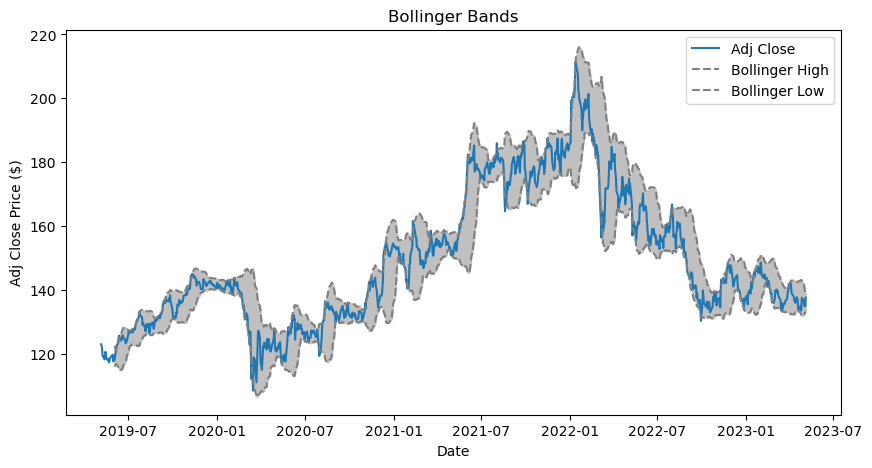

In [12]:
#plotting the Bollinger Bands 
plt.figure(figsize=(10,5))
plt.plot(dfSubset['Adj Close'], label = 'Adj Close')
plt.plot(dfSubset['Bollinger High'], label = 'Bollinger High', linestyle = '--', color = 'grey')
plt.plot(dfSubset['Bollinger Low'], label = 'Bollinger Low', linestyle = '--', color = 'grey')
plt.fill_between(dfSubset.index, dfSubset['Bollinger High'], dfSubset['Bollinger Low'], color = 'silver')
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Adj Close Price ($)')
plt.legend()
plt.show()

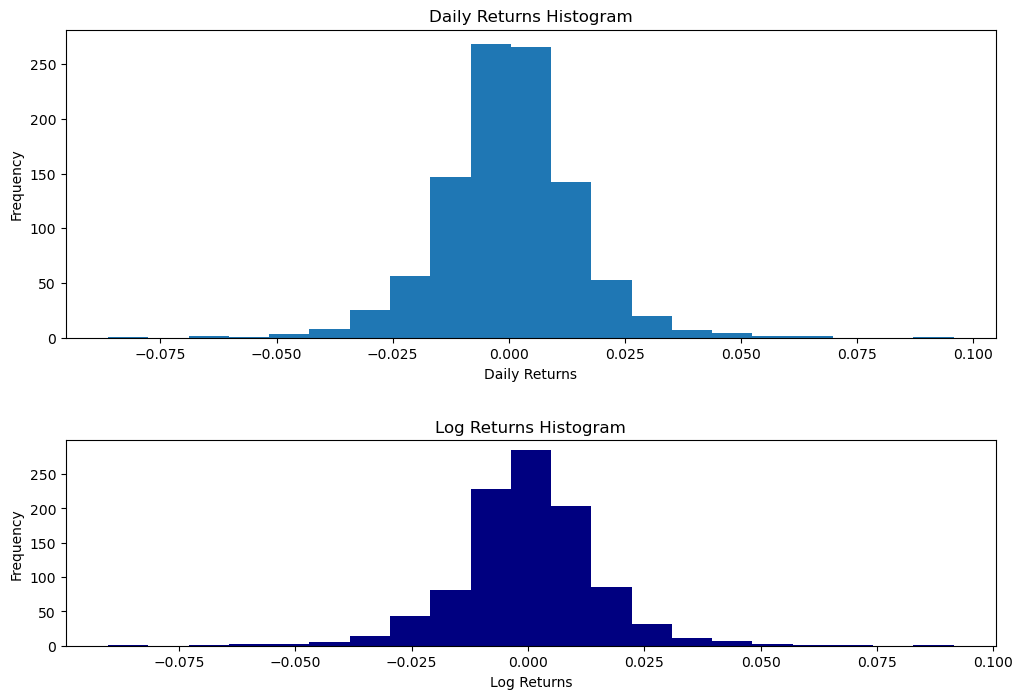

In [13]:
#creating subplots for daily and log returns
fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize = (12, 8), gridspec_kw = {'height_ratios' : [3, 2]})

#Adjusting the space between plots
fig.subplots_adjust(hspace = 0.4)

#histogram for daily returns
plt.sca(ax1)
plt.hist(dfSubset['Daily Returns'], bins = 21)
plt.title('Daily Returns Histogram')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')

#histogram for log returns
plt.sca(ax2) 
plt.hist(dfSubset['Log Returns'], bins = 21, color = 'navy')
plt.title('Log Returns Histogram')
plt.xlabel('Log Returns')
plt.ylabel('Frequency')
plt.show()

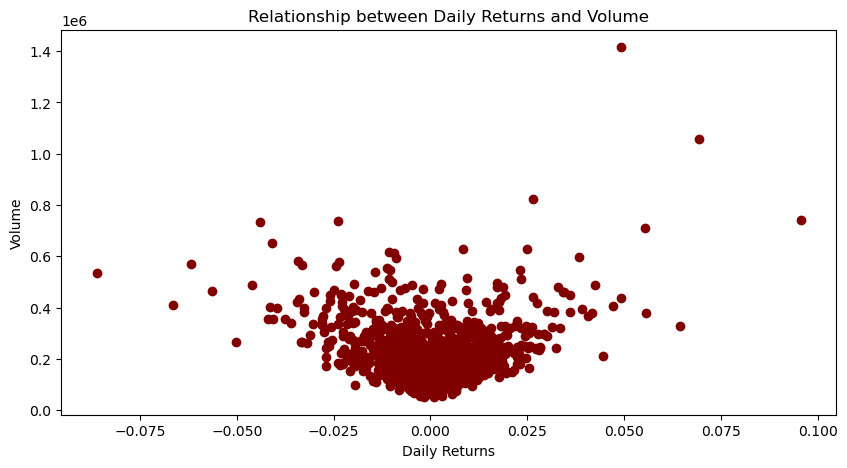

In [14]:
#scatter plot showing relationship between daily returns and volume
plt.figure(figsize = (10, 5))
plt.scatter(dfSubset['Daily Returns'], dfSubset['Volume'], color = 'maroon')
plt.title('Relationship between Daily Returns and Volume')
plt.xlabel('Daily Returns')
plt.ylabel('Volume')
plt.show()